In [1]:
#step1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#Ignore harmless warnings
import  warnings
warnings.filterwarnings("ignore")
#set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#To run sql queries on DataFrame
import pandasql as psql

In [2]:
#step2
# Load the churn data
churn= pd.read_csv(r"C:\Users\R Sobha Supriya\Downloads\Churn_Modelling.csv", header = 0)
#copy the back-up files
churn_ch=churn.copy()
#display bank data
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#step3
#dispaly data set information
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#sTEP4
#count the target or dependent variable by 0 AND 1 AND THEIR PROPORTION
#(>=10:1, THEN THE DATSET IS IMBALANCE DATA)
Exited_count=churn.Exited.value_counts()
print("class0:" ,Exited_count[0])
print("class1:" ,Exited_count[1])
print("prportion:" ,round(Exited_count[0]/Exited_count[1],2),":1")
print("total churn records:" ,len(churn))


class0: 7963
class1: 2037
prportion: 3.91 :1
total churn records: 10000


In [5]:
#step5
#dispalying duplicate values in data set
churn.duplicated().any()
#churndup=churn[churn.duplicated(keep="last")]
#display duplicate records
#churn


False

In [6]:
#step6
#identify missing values  in  the variables
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)
churn.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
churn['Geography']=churn['Geography'].map({'Spain':0,"Germany":1,"France":2})
churn['Gender']=churn['Gender'].map({"Female":0,"Male":1})


In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [13]:
#identify the independent and target variables
indepvar=[]
for col in churn.columns:
    if col!='Exited':
        indepvar.append(col)
targetvar='Exited'
x=churn[indepvar]
y=churn[targetvar]

In [14]:
# Split the data into train and test (random sampling)
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Display the shape for train & test data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

#x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = mmscaler.fit_transform(x_test)

x_test = pd.DataFrame(x_test)

In [16]:
# decision tree model with random sampling
from sklearn.tree import DecisionTreeClassifier
#create obj for model
ModelDT= DecisionTreeClassifier()
#ModelLR=LogisticRegression(penalty='l2',dyual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,class_weight=None,random_state=None,solver='lbfgs',max_iter=100,multi_class="auto",verbose=0,warm_state=False,n_jobs=None,l1_ratio=None)
ModelDT.fit(x_train,y_train)

y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)



In [17]:
#to dispaly the algorithm hyper parameters
params=ModelDT.get_params()
print(params)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


confusion_matrix:
 [[ 295  289]
 [ 347 2069]]
outcome values:
 295 289 347 2069
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.51      0.48       584
           0       0.88      0.86      0.87      2416

    accuracy                           0.79      3000
   macro avg       0.67      0.68      0.67      3000
weighted avg       0.80      0.79      0.79      3000

Accuracy : 78.8 %
Precision : 46.0 %
Recall : 50.5 %
F1 Score : 0.481
Specificity or True Negative Rate : 85.6 %
Balanced Accuracy : 68.0 %
MCC : 0.349
roc_auc_score: 0.681


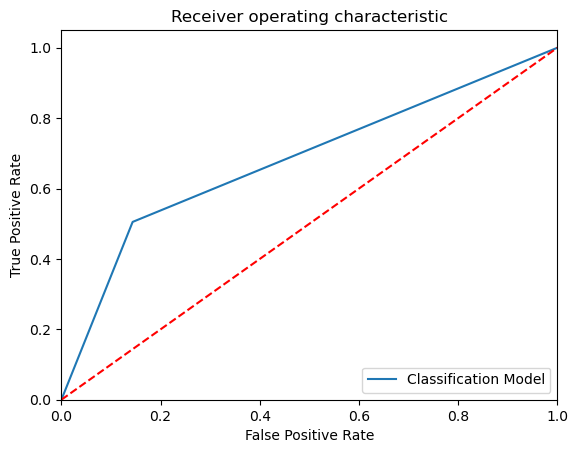

-----------------------------------------------------------------------------------------------------


In [18]:
#confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#actual values
actual=y_test
#predicted  values
predicted=y_pred
#confusin matrix
matrix=confusion_matrix(actual,predicted,labels=[1,0],sample_weight=None,normalize=None)
print("confusion_matrix:\n",matrix)
#outcomes values order in sklearn
tp,fn,fp,tn=confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print("outcome values:\n",tp,fn,fp,tn)
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [19]:
Results = pd.DataFrame({'Exited_A':y_test, 'Exited_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = churn_ch.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_A,Exited_P
157,158,15623595,Clayton,586,Spain,Female,28,2,0.00,2,1,1,92067.35,0,0,0
1901,1902,15781034,Mason,796,Spain,Male,67,5,0.00,2,0,1,54871.02,0,0,0
1199,1200,15769169,Trentino,645,France,Male,41,7,0.00,1,0,1,28667.56,0,0,1
5171,5172,15760849,Nwachukwu,537,France,Male,39,2,0.00,2,1,1,137651.60,0,0,0
6029,6030,15669011,Bocharova,659,France,Female,44,9,23503.31,1,0,1,169862.01,1,1,1


In [20]:
ResultsFinal['Exited_A']
ResultsFinal.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Exited_A,Exited_P
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,0


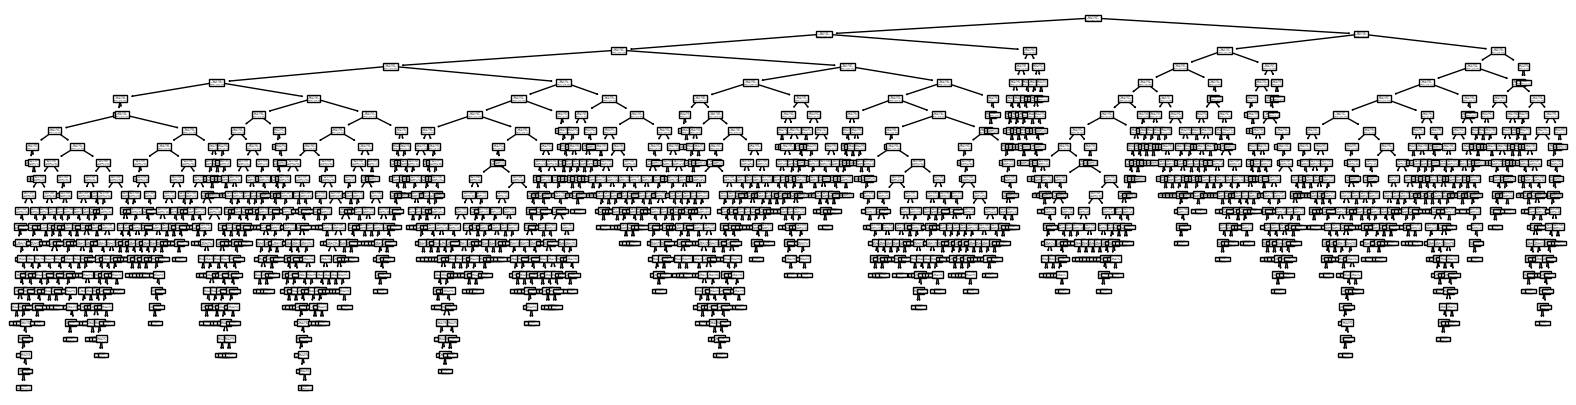

In [21]:
#PLOT THE DECISION TREE
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);